In [13]:
from os import chdir
chdir('..')
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from pyleecan.Classes.Skew import Skew
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.Output import Output
from pyleecan.Classes.SkewModel import SkewModel
from pyleecan.Classes.Magnetics import Magnetics
from numpy import pi, sin

# Load machine
SCIM_001 = load(join(DATA_DIR, "Machine", "SCIM_001.json"))

# Define lamination skew (optional): "linear", "vshape", "function"
SCIM_001.stator.skew = Skew(type="vshape", rate=36/28, is_step=True)
SCIM_001.rotor.skew = Skew(type="linear", rate=2, is_step=False)
#SCIM_001.rotor.skew = Skew(type="function", function=lambda x: sin(2*pi/0.35*x), is_step=False)

# Create simu objects
simu = Simu1(name="skew", machine=SCIM_001)
out = Output(simu=simu)
simu.mag = Magnetics()

15


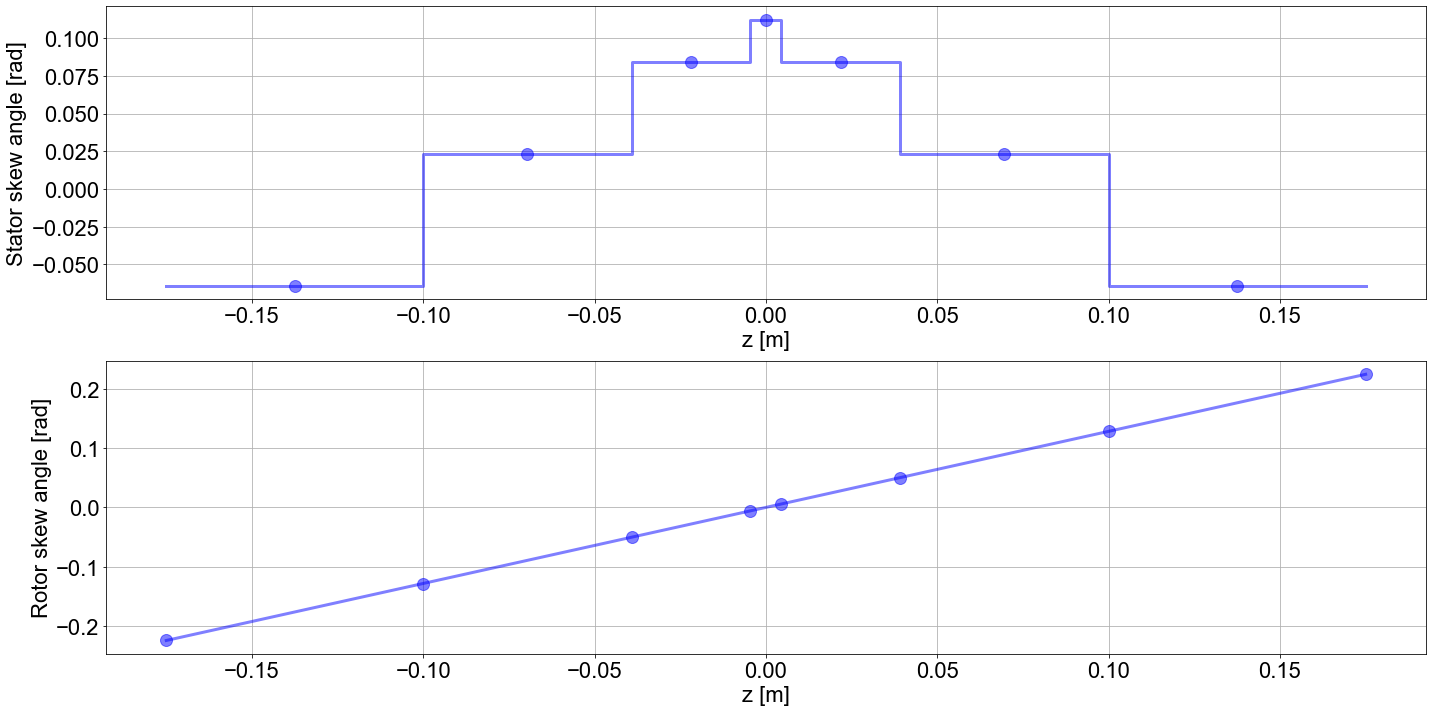

In [15]:
# Parametrize skew model: "uniform", "gauss" or "user-defined"
simu.mag.skew_model = SkewModel(type_dist="gauss", Nslices=7)

# Compute skew and plot
simu.mag.skew_model.comp_skew()
simu.mag.skew_model.plot()
print(len(out.mag.skew_axis))